<a href="https://colab.research.google.com/github/notice4/google-colab-study/blob/main/all_themes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Themes: Regression, Classtering, PCA, GridSearchCV, VotingClassifier, StackingClassifier, NeuralNetworks

In [ ]:
# Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('https://raw.githubusercontent.com/notice4/public-datasets-for-analytics/refs/heads/main/datasets/College_Admission.csv')
data.head()

,student_id,age,gender,category,state,preferred_stream,entrance_exam,entrance_score,board_percentage,extracurricular_score,admission_probability,admission_status,scholarship_eligibility
0,250.99,17,other,general,odisha,management,cet,30,95.58,2,0.387,admitted,yes
1,250.99,20,other,ews,gujarat,agriculture,none,0,75.45,2,0.221,rejected,no
2,250.99,19,female,sc,uttar pradesh,pharmacy,cet,120,75.36,10,0.446,rejected,no
3,250.99,18,male,ews,meghalaya,arts,cet,179,52.49,2,0.174,admitted,no
4,250.99,18,male,sc,rajasthan,engineering,jee,295,92.48,7,0.634,admitted,yes


In [ ]:
y = data['scholarship_eligibility']
X = data.drop(['scholarship_eligibility'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R2:', r2)

MSE: 0.1258510147615075
R2: 0.21165560908614234


In [1]:
# Classtering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

classtering_data = pd.read_csv('https://raw.githubusercontent.com/notice4/google-colab-study/refs/heads/main/Mall_Customers.csv')

model = KMeans(n_clusters=5)
classtering_data.drop(["CustomerID", "Age"], axis=1, inplace=True)
colors = model.fit_predict(classtering_data[['Annual Income (k$)', 'Spending Score (1-100)']])
X = classtering_data[['Annual Income (k$)', 'Spending Score (1-100)']]

classtering_data.head()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Male,15,39
1,Male,15,81
2,Female,16,6
3,Female,16,77
4,Female,17,40


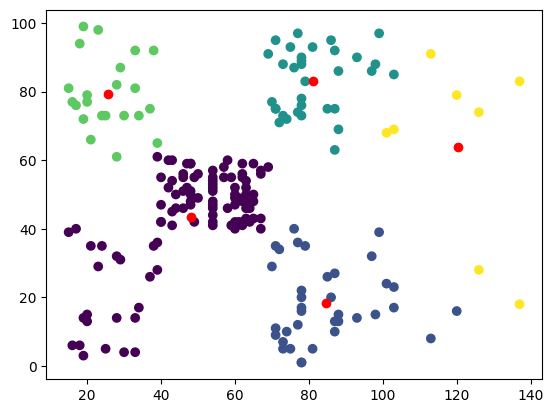

In [2]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=colors)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red')
plt.show()

In [3]:
silhouette_score(X, colors)

np.float64(0.47397911350114846)

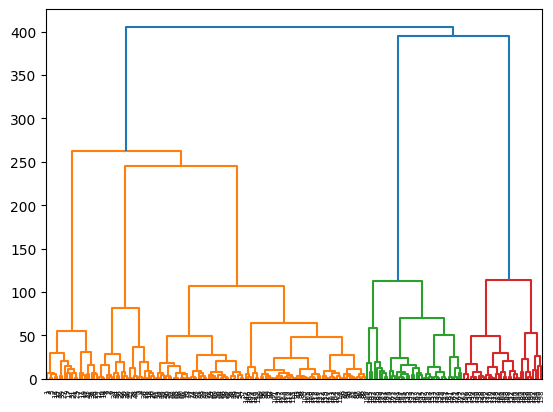

In [4]:
dendrogram(linkage(X, method='ward'))
plt.show()

In [60]:
# Neural Networks

import pandas as pd
import numpy as np
from keras.src.layers import Dense
from keras.src.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/refs/heads/master/adult.csv')
data = data[data!='?']
data.dropna(axis=0,inplace=True)
data['income'] = data['income'].map({"<=50K":0,">50K":1})
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [61]:
work_class = pd.get_dummies(data['workclass']).astype(int)
new_data = pd.concat([data,work_class],axis=1)
new_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0,0,1,0,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0,0,1,0,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0,1,0,0,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0,0,1,0,0,0,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,0,0,1,0,0,0,0


In [71]:
y=data['income'].values
X =data[['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaller = MinMaxScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

model = Sequential([
    Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(30, activation='relu'),
    Dense(30, activation='relu'),
    Dense(30, activation='relu'),
    Dense(30, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0)
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8221 - loss: 0.3894
Loss: 0.3900385797023773
Accuracy: 0.8187949061393738


In [12]:
# PCA, GridSearchCV

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('https://raw.githubusercontent.com/notice4/google-colab-study/refs/heads/main/Health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [14]:
X = data.drop(['health'], axis=1)
y = data['health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaller = StandardScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

pipeline = Pipeline([
    ('pca', PCA()),
    ('logistic', LogisticRegression())
])

param_grid = {
    'pca__n_components': [2, 5, 10, 50],
    'logistic__C': [0.0, 0.1, 1.0, 10.0, 100.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

In [15]:
print('Best parameters:', grid_search.best_params_)
print('Accuracy:', accuracy)

Best parameters: {'logistic__C': 0.1, 'pca__n_components': 10}
Accuracy: 0.8849765258215962
